In [6]:
#-*- coding: utf-8 -*-
import sys
import urllib.request

In [7]:
client_id = "_X9iNbtxufWnpoN9n0gx"
client_secret = "xUdZWWvtJJ"
url = "https://openapi.naver.com/v1/datalab/search";
#"{\"startDate\":\"2018-01-01\", \"endDate\":\"2018-02-08\", \"timeUnit\":\"date\", \"keywordGroups\": [ { \"groupName\":\"그날처럼\", \"keywords\": [ \"그날처럼\", \"그날처럼\"]}, ],}";
body = "{\"startDate\":\"2018-01-01\",\"endDate\":\"2018-02-08\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"그날처럼\",\"keywords\":[\"그날처럼\"]}]}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"startDate":"2018-01-01","endDate":"2018-02-08","timeUnit":"date","results":[{"title":"그날처럼","keywords":["그날처럼"],"data":[{"period":"2018-01-01","ratio":32.17334},{"period":"2018-01-02","ratio":34.41515},{"period":"2018-01-03","ratio":34.94981},{"period":"2018-01-04","ratio":34.75283},{"period":"2018-01-05","ratio":45.38973},{"period":"2018-01-06","ratio":100},{"period":"2018-01-07","ratio":74.09248},{"period":"2018-01-08","ratio":70.12475},{"period":"2018-01-09","ratio":67.36703},{"period":"2018-01-10","ratio":73.77356},{"period":"2018-01-11","ratio":70.15289},{"period":"2018-01-12","ratio":68.06115},{"period":"2018-01-13","ratio":72.46036},{"period":"2018-01-14","ratio":73.58596},{"period":"2018-01-15","ratio":71.93509},{"period":"2018-01-16","ratio":70.37801},{"period":"2018-01-17","ratio":67.76099},{"period":"2018-01-18","ratio":67.86417},{"period":"2018-01-19","ratio":66.28834},{"period":"2018-01-20","ratio":75.2556},{"period":"2018-01-21","ratio":89.97279},{"period":"2018-01-22",

In [8]:
import pandas as pd
import json

In [9]:
jsondata = json.loads(response_body.decode())

In [10]:
tmp = jsondata['results'][0]['data']
tmp

[{'period': '2018-01-01', 'ratio': 32.17334},
 {'period': '2018-01-02', 'ratio': 34.41515},
 {'period': '2018-01-03', 'ratio': 34.94981},
 {'period': '2018-01-04', 'ratio': 34.75283},
 {'period': '2018-01-05', 'ratio': 45.38973},
 {'period': '2018-01-06', 'ratio': 100},
 {'period': '2018-01-07', 'ratio': 74.09248},
 {'period': '2018-01-08', 'ratio': 70.12475},
 {'period': '2018-01-09', 'ratio': 67.36703},
 {'period': '2018-01-10', 'ratio': 73.77356},
 {'period': '2018-01-11', 'ratio': 70.15289},
 {'period': '2018-01-12', 'ratio': 68.06115},
 {'period': '2018-01-13', 'ratio': 72.46036},
 {'period': '2018-01-14', 'ratio': 73.58596},
 {'period': '2018-01-15', 'ratio': 71.93509},
 {'period': '2018-01-16', 'ratio': 70.37801},
 {'period': '2018-01-17', 'ratio': 67.76099},
 {'period': '2018-01-18', 'ratio': 67.86417},
 {'period': '2018-01-19', 'ratio': 66.28834},
 {'period': '2018-01-20', 'ratio': 75.2556},
 {'period': '2018-01-21', 'ratio': 89.97279},
 {'period': '2018-01-22', 'ratio': 75.61

In [11]:
df = pd.DataFrame(tmp)
df.head()

,period,ratio
0,2018-01-01,32.17334
1,2018-01-02,34.41515
2,2018-01-03,34.94981
3,2018-01-04,34.75283
4,2018-01-05,45.38973


In [12]:
df.index = df.period
del df['period']
df.head()

,ratio
period,
2018-01-01,32.17334
2018-01-02,34.41515
2018-01-03,34.94981
2018-01-04,34.75283
2018-01-05,45.38973


In [13]:
df.tail()

,ratio
period,
2018-02-04,61.72966
2018-02-05,58.74683
2018-02-06,58.71869
2018-02-07,58.19341
2018-02-08,60.10693


In [14]:
from matplotlib import pyplot as plt

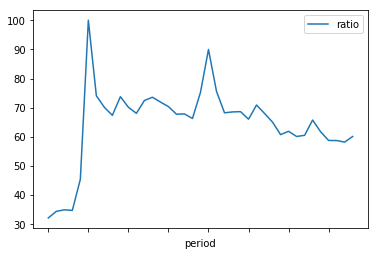

In [15]:
df.plot()
plt.show()

In [13]:
#data = pd.read_json(df["results"])
df.describe()

,ratio
count,39.000000
mean,64.572280
std,13.610394
min,32.173340
25%,60.313290
50%,67.760990
75%,70.645340
max,100.000000


In [14]:
df.corr(method='pearson')

,ratio
ratio,1.0
